In [1]:
from models.preparation import import_data, get_dtypes, compute_correlation, variables_selection, encode, normalise
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns


data = import_data()
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
data.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [3]:
data.columns.to_list()

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [4]:
dtype_to_column = get_dtypes(data)
dtype_to_column

{dtype('int64'): ['age', 'campaign', 'pdays', 'previous'],
 dtype('O'): ['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'day_of_week',
  'poutcome',
  'y'],
 dtype('float64'): ['emp.var.rate',
  'cons.price.idx',
  'cons.conf.idx',
  'euribor3m',
  'nr.employed']}

# Variables numériques

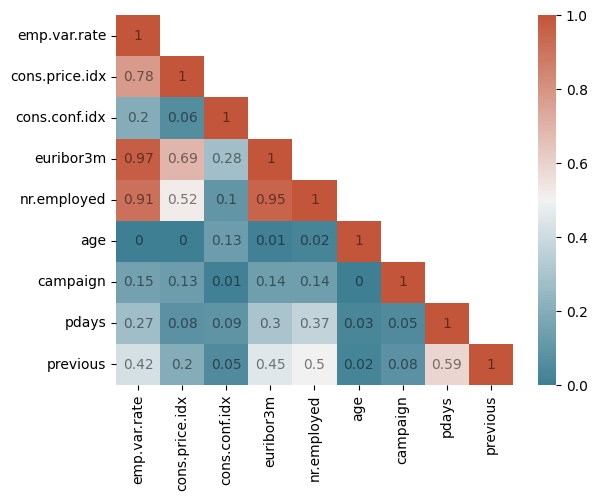

In [5]:
correlation = compute_correlation(data=data)

In [6]:
data = variables_selection(data=data)

,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,age,campaign,pdays,previous
emp.var.rate,1.00,0.78,0.20,0.91,0.00,0.15,0.27,0.42
cons.price.idx,0.78,1.00,0.06,0.52,0.00,0.13,0.08,0.20
cons.conf.idx,0.20,0.06,1.00,0.10,0.13,0.01,0.09,0.05
nr.employed,0.91,0.52,0.10,1.00,0.02,0.14,0.37,0.50
age,0.00,0.00,0.13,0.02,1.00,0.00,0.03,0.02
campaign,0.15,0.13,0.01,0.14,0.00,1.00,0.05,0.08
pdays,0.27,0.08,0.09,0.37,0.03,0.05,1.00,0.59
previous,0.42,0.20,0.05,0.50,0.02,0.08,0.59,1.00


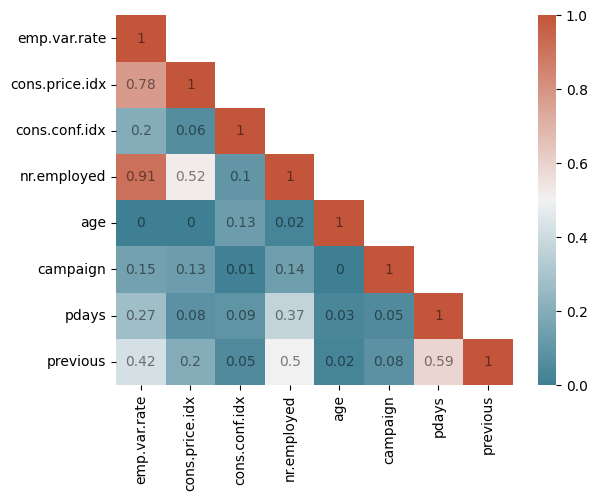

In [7]:
compute_correlation(data=data)

# Variables catégorielles

In [8]:
from scipy.stats import chi2_contingency
def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table

    return (stat/(obs*mini))

In [ ]:
labels_categorielles = dtype_to_column[np.dtype('O')]
vars_categorielles = data[labels_categorielles]

# Test du V de Cramer
rows= []

for var1 in vars_categorielles:
  col = []
  for var2 in vars_categorielles:
    cramers = cramers_V(vars_categorielles[var1], vars_categorielles[var2]) # V de Cramer
    col.append(round(cramers,2)) # arrondi du résultat   
  rows.append(col)
  
cramers_results = np.array(rows)
v_cramer_resultats = pd.DataFrame(cramers_results, columns = vars_categorielles.columns, 
                                  index = vars_categorielles.columns)

# Heatmap des tests de cramer
upper_indices = np.triu_indices_from(v_cramer_resultats, k=1)  # Indices au-dessus de la diagonale
correlation_to_be_showed = v_cramer_resultats.copy()
correlation_to_be_showed.values[upper_indices] = None  # Remplacer par None au dessus de la diagonale
        
sns.heatmap(correlation_to_be_showed, 
    center=0.5, 
    cmap=sns.diverging_palette(220, 20, as_cmap=True), 
    annot=True, 
    annot_kws={'alpha':0.5, "color": 'black'})   
v_cramer_resultats

  0%|          | 0/41188 [00:00<?, ?it/s]

  0%|          | 11/41188 [00:00<31:25, 21.83it/s]


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
job,1.00,0.03,0.13,0.02,0.00,0.0,0.02,0.01,0.0,0.01,0.02
marital,0.03,1.00,0.01,0.01,0.00,0.0,0.01,0.00,0.0,0.00,0.00
education,0.13,0.01,1.00,0.03,0.00,0.0,0.02,0.01,0.0,0.00,0.00
default,0.02,0.01,0.03,1.00,0.00,0.0,0.02,0.01,0.0,0.01,0.01
housing,0.00,0.00,0.00,0.00,1.00,0.5,0.01,0.00,0.0,0.00,0.00
loan,0.00,0.00,0.00,0.00,0.50,1.0,0.00,0.00,0.0,0.00,0.00
contact,0.02,0.01,0.02,0.02,0.01,0.0,1.00,0.37,0.0,0.06,0.02
month,0.01,0.00,0.01,0.01,0.00,0.0,0.37,1.00,0.0,0.06,0.08
day_of_week,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.0,0.00,0.00
poutcome,0.01,0.00,0.00,0.01,0.00,0.0,0.06,0.06,0.0,1.00,0.10
